In [5]:
import nltk
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the corpus data
corpus = nltk.corpus.gutenberg.sents('austen-emma.txt')

# Preprocess the text
sentences = []
for sentence in corpus:
    sentence = [word.lower() for word in sentence if word.isalpha()]
    sentences.append(sentence)

# Train the Word2Vec model
model = Word2Vec(sentences, min_count=1)

# Use the model to generate word embeddings
print(model.wv['woman'])


[-0.27709278  0.23453183  0.00457149  0.17130595  0.04518623 -0.82616824
  0.42846414  1.0637957  -0.6577988  -0.6542394  -0.3699761  -0.87681466
  0.18323608  0.15080309  0.10247254 -0.23319393  0.02425954 -0.41444007
 -0.39956537 -1.0220876   0.10870921  0.46297908  0.11586898 -0.3649527
 -0.444058   -0.05056823 -0.00143515 -0.5646518  -0.20159708  0.25828916
  0.74685395 -0.14606687  0.03098138 -0.22188868 -0.13884495  0.552974
  0.388981   -0.38130522 -0.2483212  -0.8410579   0.1432762  -0.37902063
  0.01859249 -0.23377082  0.48033282 -0.13336165 -0.53624874 -0.26205128
  0.18138945  0.03516655  0.00630995 -0.5770824  -0.07629047 -0.00394322
 -0.2029298   0.29327148  0.4454755  -0.20077409 -0.42670822  0.2085281
  0.38767895 -0.09272053  0.14246824 -0.3039408  -0.06095788  0.6782764
 -0.1069123   0.17637587 -0.6236786   0.43532023 -0.2630855   0.17814519
  0.40476933 -0.09697499  0.6071021   0.21434033 -0.05420068  0.1607996
 -0.06268544  0.08116115 -0.3271771  -0.04729841 -0.37006

C:\Users\loviy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\loviy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


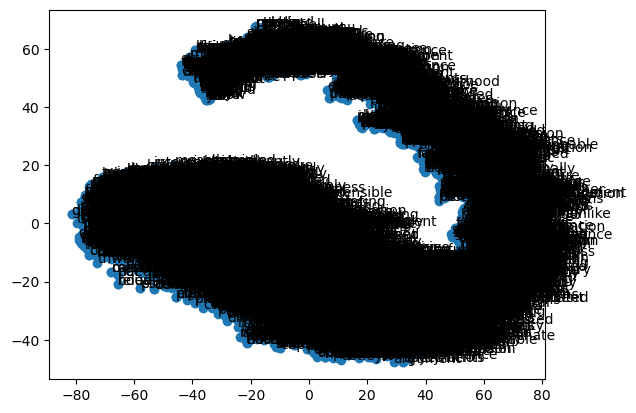

In [6]:
# Generate the t-SNE plot
X = model.wv[model.wv.index_to_key]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
plt.show()

Check the correctness of the model by plugging in word similarities

In [7]:
# Evaluate the model using the word similarity task
similarity_score = model.wv.similarity('woman', 'man')
print(f"The similarity score between 'woman' and 'man' is {similarity_score:.2f}")


The similarity score between 'woman' and 'man' is 0.99
